# XGBoost Regression Model

In this notebook is where I perform my XGBoost Regression model. Since this is proven to be my best performing model, I will do a deeper model evaluation specifically for XGBoost, also plot some graphs to analysis the features for my target prediction.

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from tempfile import mkdtemp
import warnings

c:\Users\ivant\anaconda3\envs\capstone\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ivant\anaconda3\envs\capstone\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
c:\Users\ivant\anaconda3\envs\capstone\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
numerical_df = pd.read_csv("numerical_df.csv")

In [3]:
pd.set_option('display.max_columns', None) 
numerical_df

,Player,Age,G,GS,MP,FG%,3PA,3P%,2PA,2P%,eFG%,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,team,season,Pos,Ht,Wt,Exp,PER,TS%,3PAr,AST%,STL%,BLK%,TOV%,USG%,OWS,WS,WS/48,BPM,OBPM,VORP,TRB%,Ht_cm,grouped_Pos,Pos type dummy_C,Pos type dummy_F,Pos type dummy_G,Previous PER average,Previous PER Improvement,Previous PER Improvement Average,Previous OBPM Improvement,Previous OBPM average,Previous OBPM Improvement Average,Previous TS% average,Previous PTS average,Previous USG% Improvement,Previous USG% average,Previous 3PAr average,Previous FG% average,PER Improvement
0,A.C. Green,23.0,79.0,72.0,28.4,0.538,0.1,0.000,7.4,0.543,0.538,3.6,0.780,2.7,7.8,1.1,0.9,1.0,1.3,2.2,10.8,LAL,1987/1988,PF,6-9,220.0,1.0,15.7,0.599,0.009,4.6,1.5,2.0,12.5,14.7,4.3,7.6,0.163,1.0,0.9,1.7,15.3,205.74,F,0.0,1.0,0.0,13.986667,1.2,0.300000,0.5,0.006667,0.206667,0.539867,9.453333,0.0,14.540000,0.054467,0.481200,-1.2
1,A.C. Green,24.0,82.0,64.0,32.1,0.503,0.0,0.000,7.8,0.505,0.503,4.6,0.773,3.0,8.7,1.1,1.1,0.5,1.5,2.5,11.4,LAL,1988/1989,PF,6-9,220.0,2.0,14.5,0.581,0.003,4.5,1.6,1.0,12.9,14.7,4.5,7.9,0.144,0.3,0.4,1.5,15.3,205.74,F,0.0,1.0,0.0,13.950000,-3.3,0.235714,-1.4,-0.021429,0.185714,0.536929,9.314286,-2.3,14.528571,0.058143,0.479643,3.3
2,A.C. Green,25.0,82.0,82.0,30.6,0.529,0.2,0.235,9.0,0.536,0.532,4.4,0.786,3.1,9.0,1.3,1.1,0.7,1.5,2.1,13.3,LAL,1989/1990,PF,6-9,220.0,3.0,17.8,0.594,0.022,5.5,1.8,1.2,11.5,17.0,5.8,9.4,0.179,1.6,1.8,2.3,16.4,205.74,F,0.0,1.0,0.0,13.653846,3.1,0.507692,1.5,-0.161538,0.307692,0.532538,9.007692,-0.1,14.338462,0.060923,0.475846,-3.1
3,A.C. Green,26.0,82.0,82.0,33.0,0.478,0.6,0.283,9.3,0.489,0.486,4.5,0.751,3.2,8.7,1.1,0.8,0.6,1.4,2.5,12.9,LAL,1990/1991,PF,6-9,220.0,4.0,14.7,0.548,0.057,4.6,1.2,1.1,10.7,17.1,4.4,7.7,0.137,-0.6,0.3,1.0,15.1,205.74,F,0.0,1.0,0.0,13.566667,0.9,0.291667,0.2,-0.200000,0.208333,0.531250,8.683333,1.5,14.108333,0.061250,0.475667,-0.9
4,A.C. Green,27.0,82.0,21.0,26.4,0.476,0.7,0.200,5.9,0.507,0.486,3.7,0.738,2.5,6.3,0.9,0.7,0.3,1.2,1.4,9.1,LAL,1991/1992,PF,6-9,220.0,5.0,13.8,0.556,0.101,4.5,1.4,0.6,12.8,15.6,3.2,6.1,0.135,0.0,0.1,1.1,13.8,205.74,F,0.0,1.0,0.0,13.545455,-2.9,0.236364,-1.6,-0.227273,0.209091,0.529000,8.645455,-1.2,13.972727,0.057636,0.475636,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11389,Žarko Čabarkapa,23.0,37.0,0.0,12.5,0.482,1.0,0.361,3.6,0.515,0.521,1.7,0.813,0.9,2.7,0.7,0.3,0.1,0.8,1.6,6.2,GSW,2005/2006,PF,6-11,235.0,1.0,16.5,0.578,0.212,9.2,1.1,0.8,13.1,21.7,0.8,1.2,0.124,-0.5,0.1,0.2,11.6,210.82,F,0.0,1.0,0.0,16.500000,0.0,0.000000,0.0,0.100000,0.000000,0.578000,6.200000,0.0,21.700000,0.212000,0.482000,-6.6
11390,Željko Rebrača,29.0,74.0,4.0,15.9,0.505,0.0,0.000,5.1,0.505,0.505,2.4,0.771,1.1,3.9,0.5,0.4,1.0,1.1,2.6,6.9,DET,2002/2003,C,7-0,257.0,0.0,16.2,0.569,0.000,5.7,1.3,4.4,15.7,21.4,1.4,3.3,0.134,-2.3,-2.9,-0.1,14.5,213.36,C,1.0,0.0,0.0,12.350000,5.5,1.100000,0.8,-2.700000,-0.600000,0.608500,5.250000,5.9,15.750000,0.000000,0.555000,-2.2
11391,Željko Rebrača,30.0,30.0,12.0,16.3,0.552,0.0,0.000,4.8,0.552,0.552,1.6,0.792,0.9,3.1,0.3,0.2,0.6,1.0,2.6,6.6,DET,2003/2004,C,7-0,257.0,1.0,14.0,0.596,0.000,3.6,0.7,2.6,14.9,19.2,0.7,1.3,0.133,-2.6,-2.8,-0.1,11.2,213.36,C,1.0,0.0,0.0,13.633333,-2.2,0.000000,0.1,-2.766667,-0.366667,0.595333,5.800000,-2.2,17.633333,0.000000,0.538333,-4.4
11392,Željko Rebrača,31.0,21.0,2.0,10.6,0.407,0.0,0.000,2.6,0.407,0.407,1.3,0.786,0.9,2.3,0.2,0.2,0.4,0.6,2.1,3.1,DET,2004/2005,C,7-0,257.0,2.0,9.6,0.498,0.000,3.0,1.2,3.1,16.4,16.7,0.1,0.5,0.115,-3.9,-5.1,-0.1,12.8,213.36,C,1.0,0.0,0.0,13.725000,-4.4,-1.100000,-2.3,-2.775000,-0.850000,0.595500,6.000000,-2.5,18.025000,0.000000,0.541750,4.4


In [4]:
numerical_df.loc[numerical_df["Player"] == "Kevin Durant"]

,Player,Age,G,GS,MP,FG%,3PA,3P%,2PA,2P%,eFG%,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,team,season,Pos,Ht,Wt,Exp,PER,TS%,3PAr,AST%,STL%,BLK%,TOV%,USG%,OWS,WS,WS/48,BPM,OBPM,VORP,TRB%,Ht_cm,grouped_Pos,Pos type dummy_C,Pos type dummy_F,Pos type dummy_G,Previous PER average,Previous PER Improvement,Previous PER Improvement Average,Previous OBPM Improvement,Previous OBPM average,Previous OBPM Improvement Average,Previous TS% average,Previous PTS average,Previous USG% Improvement,Previous USG% average,Previous 3PAr average,Previous FG% average,PER Improvement
6240,Kevin Durant,19.0,80.0,80.0,34.6,0.430,2.6,0.288,14.5,0.455,0.451,5.6,0.873,0.9,4.4,2.4,1.0,0.9,2.9,1.5,20.3,SEA,2008/2009,SG,6-11,240.0,0.0,15.8,0.519,0.150,12.0,1.4,1.9,12.9,28.1,0.4,2.3,0.040,-0.1,0.5,1.3,6.9,210.82,G,0.0,0.0,1.0,15.800000,0.0,0.000000,0.0,0.500000,0.000000,0.519000,20.300000,0.0,28.100000,0.150000,0.430000,5.0
6241,Kevin Durant,20.0,74.0,74.0,39.0,0.476,3.1,0.422,15.7,0.486,0.510,7.1,0.863,1.0,6.5,2.8,1.3,0.7,3.0,1.8,25.3,OKC,2009/2010,SF,6-11,240.0,1.0,20.8,0.577,0.165,13.5,1.7,1.4,12.2,28.3,5.2,7.9,0.132,3.3,3.4,3.8,9.6,210.82,F,0.0,1.0,0.0,15.800000,5.0,5.000000,2.9,0.500000,2.900000,0.519000,20.300000,0.2,28.100000,0.150000,0.430000,5.4
6242,Kevin Durant,21.0,82.0,82.0,39.5,0.476,4.3,0.365,16.1,0.506,0.514,10.2,0.900,1.3,7.6,2.8,1.4,1.0,3.3,2.1,30.1,OKC,2010/2011,SF,6-11,240.0,2.0,26.2,0.607,0.210,13.5,1.8,1.9,11.7,32.0,11.1,16.1,0.238,7.1,6.3,7.5,11.0,210.82,F,0.0,1.0,0.0,18.300000,5.4,5.200000,2.9,1.950000,2.900000,0.548000,22.800000,3.7,28.200000,0.157500,0.453000,-2.6
6243,Kevin Durant,22.0,78.0,78.0,38.9,0.462,5.3,0.350,14.4,0.504,0.509,8.7,0.880,0.7,6.8,2.7,1.1,1.0,2.8,2.0,27.7,OKC,2011/2012,SF,6-11,240.0,3.0,23.6,0.589,0.269,13.2,1.5,1.8,10.6,30.6,8.6,12.0,0.189,4.9,5.2,5.3,10.3,210.82,F,0.0,1.0,0.0,20.933333,-2.6,2.600000,-1.1,3.400000,1.566667,0.567667,25.233333,-1.4,29.466667,0.175000,0.460667,2.6
6244,Kevin Durant,23.0,66.0,66.0,38.6,0.496,5.2,0.387,14.4,0.535,0.547,7.6,0.860,0.6,8.0,3.5,1.3,1.2,3.8,2.0,28.0,OKC,2012/2013,SF,6-11,240.0,4.0,26.2,0.610,0.265,17.5,1.8,2.2,14.0,31.3,8.5,12.2,0.230,7.0,6.2,5.8,11.8,210.82,F,0.0,1.0,0.0,21.600000,2.6,2.600000,1.0,3.850000,1.425000,0.573000,25.850000,0.7,29.750000,0.198500,0.461000,2.1
6245,Kevin Durant,24.0,81.0,81.0,38.5,0.510,4.1,0.416,13.6,0.539,0.559,9.3,0.905,0.6,7.9,4.6,1.4,1.3,3.5,1.8,28.1,OKC,2013/2014,SF,6-11,240.0,5.0,28.3,0.647,0.233,21.7,1.9,2.6,13.7,29.8,13.6,18.9,0.291,9.3,7.6,8.9,11.8,210.82,F,0.0,1.0,0.0,22.520000,2.1,2.500000,1.4,4.320000,1.420000,0.580400,26.280000,-1.5,30.060000,0.211800,0.468000,1.5
6246,Kevin Durant,25.0,81.0,81.0,38.5,0.503,6.1,0.391,14.8,0.549,0.560,9.9,0.873,0.7,7.4,5.5,1.3,0.7,3.5,2.1,32.0,OKC,2014/2015,SF,6-11,240.0,6.0,29.8,0.635,0.291,26.7,1.7,1.5,12.2,33.0,14.8,19.2,0.295,10.2,8.8,9.6,10.8,210.82,F,0.0,1.0,0.0,23.483333,1.5,2.333333,1.2,4.866667,1.383333,0.591500,26.583333,3.2,30.016667,0.215333,0.475000,-2.2
6247,Kevin Durant,26.0,27.0,27.0,33.8,0.510,5.9,0.403,11.4,0.565,0.578,6.3,0.854,0.6,6.6,4.1,0.9,0.9,2.7,1.5,25.4,OKC,2015/2016,SF,6-11,240.0,7.0,27.6,0.633,0.340,22.2,1.3,2.2,12.0,29.1,3.8,4.8,0.252,10.0,8.6,2.8,10.4,210.82,F,0.0,1.0,0.0,24.385714,-2.2,1.685714,-0.2,5.428571,1.157143,0.597714,27.357143,-3.9,30.442857,0.226143,0.479000,0.6
6248,Kevin Durant,27.0,72.0,72.0,35.8,0.505,6.7,0.387,12.5,0.569,0.573,6.9,0.898,0.6,8.2,5.0,1.0,1.2,3.5,1.9,28.2,OKC,2016/2017,SF,6-11,240.0,8.0,28.2,0.634,0.348,24.2,1.3,2.5,13.5,30.6,11.0,14.5,0.270,9.9,8.4,7.8,12.4,210.82,F,0.0,1.0,0.0,24.787500,0.6,1.550000,-0.2,5.825000,0.987500,0.602125,27.112500,1.5,30.275000,0.240375,0.482875,-0.6
6249,Kevin Durant,28.0,62.0,62.0,33.4,0.537,5.0,0.375,11.5,0.608,0.594,6.2,0.875,0.6,8.3,4.8,1.1,1.6,2.2,1.9,25.1,GSW,2017/2018,PF,6-11,240.0,9.0,27.6,0.651,0.304,23.1,1.5,3.8,10.4,27.8,8.0,12.0,0.278,8.9,6.7,5.7,13.6,210.82,F,0.0,1.0,0.0,25.166667,-0.6,1.311111,-1.7,6.111111,0.688889,0.605667,27.233333,-2.8,30.311111,0.252333,0.485333,-1.6


In [5]:
# Lets look at out datatypes in our dataframe.
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11394 entries, 0 to 11393
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player                             11394 non-null  object 
 1   Age                                11394 non-null  float64
 2   G                                  11394 non-null  float64
 3   GS                                 11394 non-null  float64
 4   MP                                 11394 non-null  float64
 5   FG%                                11394 non-null  float64
 6   3PA                                11394 non-null  float64
 7   3P%                                11394 non-null  float64
 8   2PA                                11394 non-null  float64
 9   2P%                                11394 non-null  float64
 10  eFG%                               11394 non-null  float64
 11  FTA                                11394 non-null  flo

In [6]:
# Separate the metadata from the features used for modeling
metadata = numerical_df[['Player', 'season', 'team', 'Age']]

In [7]:
numerical_df = numerical_df.select_dtypes(exclude=['object'])

In [8]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11394 entries, 0 to 11393
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11394 non-null  float64
 1   G                                  11394 non-null  float64
 2   GS                                 11394 non-null  float64
 3   MP                                 11394 non-null  float64
 4   FG%                                11394 non-null  float64
 5   3PA                                11394 non-null  float64
 6   3P%                                11394 non-null  float64
 7   2PA                                11394 non-null  float64
 8   2P%                                11394 non-null  float64
 9   eFG%                               11394 non-null  float64
 10  FTA                                11394 non-null  float64
 11  FT%                                11394 non-null  flo

In [9]:
numerical_df

,Age,G,GS,MP,FG%,3PA,3P%,2PA,2P%,eFG%,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,Wt,Exp,PER,TS%,3PAr,AST%,STL%,BLK%,TOV%,USG%,OWS,WS,WS/48,BPM,OBPM,VORP,TRB%,Ht_cm,Pos type dummy_C,Pos type dummy_F,Pos type dummy_G,Previous PER average,Previous PER Improvement,Previous PER Improvement Average,Previous OBPM Improvement,Previous OBPM average,Previous OBPM Improvement Average,Previous TS% average,Previous PTS average,Previous USG% Improvement,Previous USG% average,Previous 3PAr average,Previous FG% average,PER Improvement
0,23.0,79.0,72.0,28.4,0.538,0.1,0.000,7.4,0.543,0.538,3.6,0.780,2.7,7.8,1.1,0.9,1.0,1.3,2.2,10.8,220.0,1.0,15.7,0.599,0.009,4.6,1.5,2.0,12.5,14.7,4.3,7.6,0.163,1.0,0.9,1.7,15.3,205.74,0.0,1.0,0.0,13.986667,1.2,0.300000,0.5,0.006667,0.206667,0.539867,9.453333,0.0,14.540000,0.054467,0.481200,-1.2
1,24.0,82.0,64.0,32.1,0.503,0.0,0.000,7.8,0.505,0.503,4.6,0.773,3.0,8.7,1.1,1.1,0.5,1.5,2.5,11.4,220.0,2.0,14.5,0.581,0.003,4.5,1.6,1.0,12.9,14.7,4.5,7.9,0.144,0.3,0.4,1.5,15.3,205.74,0.0,1.0,0.0,13.950000,-3.3,0.235714,-1.4,-0.021429,0.185714,0.536929,9.314286,-2.3,14.528571,0.058143,0.479643,3.3
2,25.0,82.0,82.0,30.6,0.529,0.2,0.235,9.0,0.536,0.532,4.4,0.786,3.1,9.0,1.3,1.1,0.7,1.5,2.1,13.3,220.0,3.0,17.8,0.594,0.022,5.5,1.8,1.2,11.5,17.0,5.8,9.4,0.179,1.6,1.8,2.3,16.4,205.74,0.0,1.0,0.0,13.653846,3.1,0.507692,1.5,-0.161538,0.307692,0.532538,9.007692,-0.1,14.338462,0.060923,0.475846,-3.1
3,26.0,82.0,82.0,33.0,0.478,0.6,0.283,9.3,0.489,0.486,4.5,0.751,3.2,8.7,1.1,0.8,0.6,1.4,2.5,12.9,220.0,4.0,14.7,0.548,0.057,4.6,1.2,1.1,10.7,17.1,4.4,7.7,0.137,-0.6,0.3,1.0,15.1,205.74,0.0,1.0,0.0,13.566667,0.9,0.291667,0.2,-0.200000,0.208333,0.531250,8.683333,1.5,14.108333,0.061250,0.475667,-0.9
4,27.0,82.0,21.0,26.4,0.476,0.7,0.200,5.9,0.507,0.486,3.7,0.738,2.5,6.3,0.9,0.7,0.3,1.2,1.4,9.1,220.0,5.0,13.8,0.556,0.101,4.5,1.4,0.6,12.8,15.6,3.2,6.1,0.135,0.0,0.1,1.1,13.8,205.74,0.0,1.0,0.0,13.545455,-2.9,0.236364,-1.6,-0.227273,0.209091,0.529000,8.645455,-1.2,13.972727,0.057636,0.475636,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11389,23.0,37.0,0.0,12.5,0.482,1.0,0.361,3.6,0.515,0.521,1.7,0.813,0.9,2.7,0.7,0.3,0.1,0.8,1.6,6.2,235.0,1.0,16.5,0.578,0.212,9.2,1.1,0.8,13.1,21.7,0.8,1.2,0.124,-0.5,0.1,0.2,11.6,210.82,0.0,1.0,0.0,16.500000,0.0,0.000000,0.0,0.100000,0.000000,0.578000,6.200000,0.0,21.700000,0.212000,0.482000,-6.6
11390,29.0,74.0,4.0,15.9,0.505,0.0,0.000,5.1,0.505,0.505,2.4,0.771,1.1,3.9,0.5,0.4,1.0,1.1,2.6,6.9,257.0,0.0,16.2,0.569,0.000,5.7,1.3,4.4,15.7,21.4,1.4,3.3,0.134,-2.3,-2.9,-0.1,14.5,213.36,1.0,0.0,0.0,12.350000,5.5,1.100000,0.8,-2.700000,-0.600000,0.608500,5.250000,5.9,15.750000,0.000000,0.555000,-2.2
11391,30.0,30.0,12.0,16.3,0.552,0.0,0.000,4.8,0.552,0.552,1.6,0.792,0.9,3.1,0.3,0.2,0.6,1.0,2.6,6.6,257.0,1.0,14.0,0.596,0.000,3.6,0.7,2.6,14.9,19.2,0.7,1.3,0.133,-2.6,-2.8,-0.1,11.2,213.36,1.0,0.0,0.0,13.633333,-2.2,0.000000,0.1,-2.766667,-0.366667,0.595333,5.800000,-2.2,17.633333,0.000000,0.538333,-4.4
11392,31.0,21.0,2.0,10.6,0.407,0.0,0.000,2.6,0.407,0.407,1.3,0.786,0.9,2.3,0.2,0.2,0.4,0.6,2.1,3.1,257.0,2.0,9.6,0.498,0.000,3.0,1.2,3.1,16.4,16.7,0.1,0.5,0.115,-3.9,-5.1,-0.1,12.8,213.36,1.0,0.0,0.0,13.725000,-4.4,-1.100000,-2.3,-2.775000,-0.850000,0.595500,6.000000,-2.5,18.025000,0.000000,0.541750,4.4


# Test Split

In [10]:
y = numerical_df["PER Improvement"] # Setting our "PER Improvement" as our target variable
X = numerical_df.drop("PER Improvement", axis = 1) #Setting all other features as our data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 100) # I am splitting the dataset so that we have 90% as trainning set, giving us around 1000 rows of data for testing set.

In [11]:
# Keep the corresponding metadata for the test set
metadata_test = metadata.iloc[X_test.index].reset_index(drop=True)

# Xgboost regression

In [12]:
warnings.filterwarnings('ignore')
cachedir = mkdtemp()

estimators = [('normalise', StandardScaler()),   
            #('reduce_dim', PCA(n_components = 40)),
              ('xgb', XGBRegressor(random_state=1))]
pipe = Pipeline(estimators, memory = cachedir) 

param_grid = {
    'xgb__n_estimators': [260, 270, 280, 290, 300],
    'xgb__max_depth': [4, 5, 6, 7],
    'xgb__learning_rate': [0.01, 0.02, 0.03, 0.04],
    'xgb__min_child_weight': [0.001],
    'xgb__subsample': [0.6, 0.7, 0.8]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=5, refit=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END xgb__learning_rate=0.01, xgb__max_depth=4, xgb__min_child_weight=0.001, xgb__n_estimators=260, xgb__subsample=0.6; total time=   0.7s
[CV 2/5] END xgb__learning_rate=0.01, xgb__max_depth=4, xgb__min_child_weight=0.001, xgb__n_estimators=260, xgb__subsample=0.6; total time=   0.7s
[CV 3/5] END xgb__learning_rate=0.01, xgb__max_depth=4, xgb__min_child_weight=0.001, xgb__n_estimators=260, xgb__subsample=0.6; total time=   0.7s
[CV 4/5] END xgb__learning_rate=0.01, xgb__max_depth=4, xgb__min_child_weight=0.001, xgb__n_estimators=260, xgb__subsample=0.6; total time=   0.8s
[CV 5/5] END xgb__learning_rate=0.01, xgb__max_depth=4, xgb__min_child_weight=0.001, xgb__n_estimators=260, xgb__subsample=0.6; total time=   0.7s
[CV 1/5] END xgb__learning_rate=0.01, xgb__max_depth=4, xgb__min_child_weight=0.001, xgb__n_estimators=260, xgb__subsample=0.7; total time=   0.6s
[CV 2/5] END xgb__learning_rate=0.01, xgb__max_depth=4

GridSearchCV(cv=5,
             estimator=Pipeline(memory='C:\\Users\\ivant\\AppData\\Local\\Temp\\tmpyn0g46ky',
                                steps=[('normalise', StandardScaler()),
                                       ('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                    

In [13]:
from sklearn.metrics import accuracy_score
best_params = grid_search.best_params_  # Getting the best parameters from our grid search
print(f"Best parameters: {best_params}") 

XG_best_pipe = grid_search.best_estimator_

Best parameters: {'xgb__learning_rate': 0.02, 'xgb__max_depth': 7, 'xgb__min_child_weight': 0.001, 'xgb__n_estimators': 290, 'xgb__subsample': 0.7}


The best parameters for our XGBoost model is:
Learning rate of 0.02
Max depth of 6
Min child weight of 0.001
Number of estimators of 290
Subsample of 0.7

290 estimators is a lot higher than our RandomForest model which is 240.

In [14]:
best_validation_performance = grid_search.best_score_  # Getting the best validation set score from our grid search
print(f"Best validation performance: {best_validation_performance}")

y_test_pred = XG_best_pipe.predict(X_test)  # make predictions on training set 

r2_test = r2_score(y_test, y_test_pred)  # get r2 
print(f'R squared: {round(r2_test, 3)}')

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))  # get rmse 
print(f'RMSE: {round(rmse_test, 2)}')

mae_test = mean_absolute_error(y_test, y_test_pred)  # get mae
print(f'MAE: {round(mae_test, 2)}')

Best validation performance: 0.3493148931149581
R squared: 0.354
RMSE: 2.33
MAE: 1.73


Our XGBoost model performed the best out of all models we tested. With the best validation score of 34.3%, test RSquared of 38.9%. Also the least amount of error with by far the lowest RMSE: 2.37 and one of the lowest MAE: 1.76.

Next I want to plot the top 25 features for their importance from our XGBoost model.

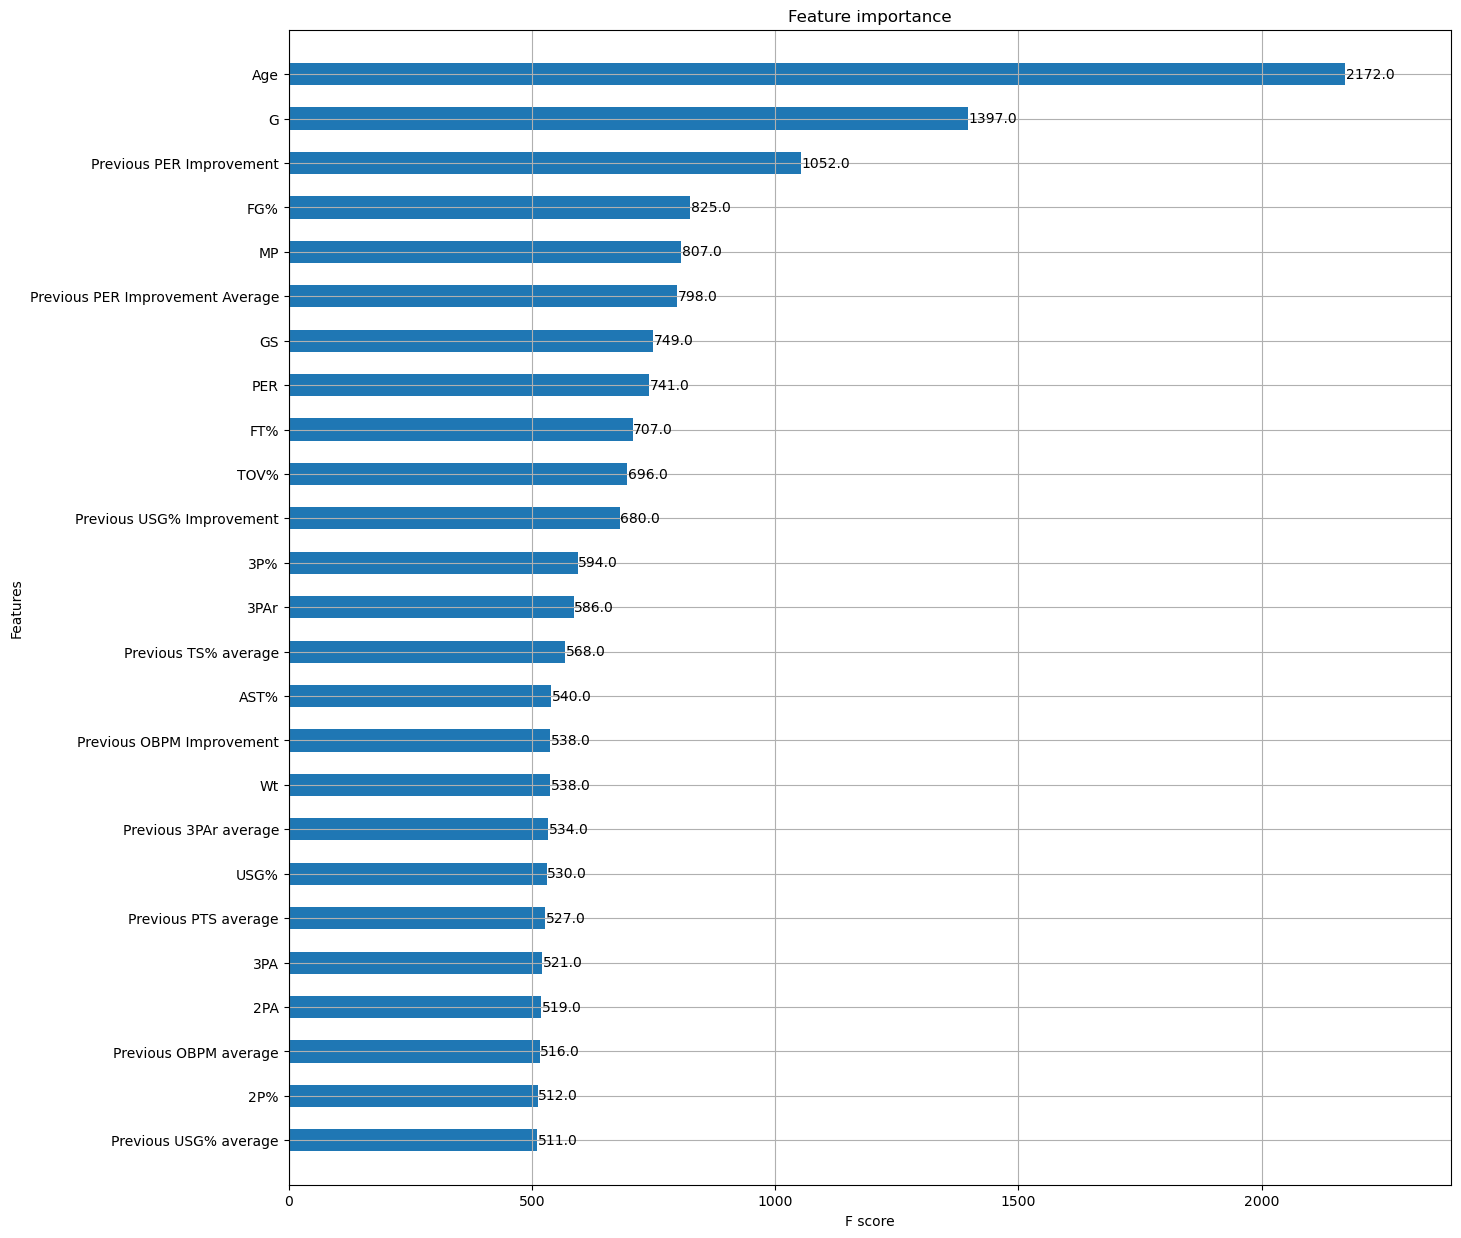

In [15]:
from xgboost import plot_importance
import matplotlib.pyplot as plt



XG_best_pipe.fit(X_train, y_train) # Fit the model on the training data

xgb_model = XG_best_pipe.named_steps['xgb'] # Access the XGBoost model from the pipeline


xgb_model.get_booster().feature_names = [str(i) for i in X_train.columns] # Set feature names to the booster
fig, ax = plt.subplots(figsize=(15, 15))
plot_importance(xgb_model, ax=ax, height=0.5, max_num_features=25, importance_type='weight') # I only want to show the top 25
plt.show()

The top 25 features from XGBoost shows a complete different result to our linear regression. However these features make more sense and I believe gives us a better insight to what contribute to a players improvement for predictions. Age being the highest importance out of all the features in F score makes sense, as we already see from our player improvement trend graph from our EDA that a players's improvement will start to decrease over their career year, and start stablising. 

Previous PER Improvement being the second most important feature confirms a player tends to zig-zag in their improvement trend. A big seasonal improvement from one season is very unlikely to continue, and will expect in a decline in return on average across the players. G represents the number of games a player played in a season. The number of games a player plays can heavily impact their improvement next season. Hence we can predict that when a player played more games in a season, the bigger improvement a player can achieve next season on average. MP is also on the list, which links to G for similar reason relating to their game time played leading improvement. 

PER and FG% are 5th and 6th on the list, and they are top 2 in the linear regression list. This shows that these two features still have a big influence to our target, but less than some other features in our XGBoost model. 

9 out of 10 engineered features appeared in our list. This shows that the past historical performances of a player can be great indicators to predict how much a player can improve in the incoming season. Features like past averages can help showing the improvement rate of a player. One previous season stats are also great indicators as player improvement trends are tend to be zig-zaging.

In [16]:
# I want to make a list of the value of errors my model make. So then I can use then to find out the percentage of overestimating and underestimating.

errors = y_test_pred - y_test

errors_df = pd.DataFrame({'Actual PER Improvement': y_test, 'Predicted PER Improvement': y_test_pred, 'Error': errors})

errors_df.reset_index(drop=True, inplace=True) # Reset index if y_test is a Series with an index that doesn't start from 0 or doesn't match the original DataFrame's index

final_df = pd.concat([metadata_test, errors_df], axis=1)

final_df

,Player,season,team,Age,Actual PER Improvement,Predicted PER Improvement,Error
0,Bobby Jackson,2003/2004,SAC,29.0,0.8,-2.060912,-2.860912
1,Sam Cassell,2003/2004,MIL,33.0,0.5,-0.921697,-1.421697
2,Cedric Ceballos,2000/2001,DAL,30.0,-1.7,0.444560,2.144560
3,Jamal Crawford,2008/2009,NYK,27.0,-1.0,-1.135077,-0.135077
4,Brian Scalabrine,2002/2003,NJN,23.0,4.7,4.224517,-0.475483
...,...,...,...,...,...,...,...
1135,Toni Kukoč,2000/2001,PHI,31.0,-1.1,-1.250270,-0.150270
1136,Olden Polynice,1997/1998,SAC,32.0,1.6,0.800488,-0.799512
1137,Quentin Grimes,2022/2023,NYK,21.0,1.0,-0.510594,-1.510594
1138,Andrei Kirilenko,2008/2009,UTA,26.0,-0.4,-1.439223,-1.039223


In [17]:
overestimation_percentage = (errors_df['Error'] > 0).mean() * 100
underestimation_percentage = (errors_df['Error'] < 0).mean() * 100

print(f"Overestimation Percentage: {overestimation_percentage}%")
print(f"Underestimation Percentage: {underestimation_percentage}%")

Overestimation Percentage: 47.10526315789474%
Underestimation Percentage: 52.89473684210526%


We find that our overestimation is 47% and underestimation is 53%. This is a pretty balanced result, showing our model doesn't particularing over or under estimate in the predictions.

Next I want to check how accurate is our model in predicting if a player actually "improved" or not. We can check by testing if our "Predicted PER Improvement" is > 0 when the "Actual PER Improvement" is also > 0.

In [18]:
errors_df['Correct Prediction of Improvement'] = (
    (errors_df['Predicted PER Improvement'] > 0) & (errors_df['Actual PER Improvement'] > 0) |
    (errors_df['Predicted PER Improvement'] < 0) & (errors_df['Actual PER Improvement'] < 0)
)

total_actual_improvements = ((final_df['Actual PER Improvement'] > 0) | (final_df['Actual PER Improvement'] < 0)).sum()  
correct_predictions_of_improvement = errors_df['Correct Prediction of Improvement'].sum()  # Total correct predictions of improvement


if total_actual_improvements > 0:
    correct_prediction_percentage = (correct_predictions_of_improvement / total_actual_improvements) * 100
else:
    correct_prediction_percentage = 0  # To handle cases where there are no actual improvements

print(f"Percentage of correctly predicting a player improving when the player actually improved: {correct_prediction_percentage}%")

Percentage of correctly predicting a player improving when the player actually improved: 71.01967799642217%


We have a accuracy score of 71.93%, which is pretty good considering the class balance is around 50/50. 

Now lets look at the training set which includes a much bigger dataset

In [19]:
# Other than test set, I also want to make predictions on the training set for comparison later.

y_train_pred = XG_best_pipe.predict(X_train)  # make predictions on training set 

In [20]:
errors = y_train_pred - y_train

errors_train_df = pd.DataFrame({'Actual PER Improvement': y_train, 'Predicted PER Improvement': y_train_pred, 'Error': errors})

errors_train_df.reset_index(drop=True, inplace=True) # Reset index if y_test is a Series with an index that doesn't start from 0 or doesn't match the original DataFrame's index

print(errors_train_df)

       Actual PER Improvement  Predicted PER Improvement     Error
0                         0.6                  -0.561239 -1.161239
1                         1.7                   2.748370  1.048370
2                         2.2                   0.919974 -1.280026
3                        -3.2                  -0.641707  2.558293
4                         0.4                   1.317171  0.917171
...                       ...                        ...       ...
10249                     1.4                   0.897972 -0.502028
10250                    -2.1                   0.012822  2.112822
10251                     3.1                   1.449597 -1.650403
10252                    -4.9                  -2.991550  1.908450
10253                     1.6                   1.242656 -0.357344

[10254 rows x 3 columns]


In [21]:
overestimation_percentage = (errors_train_df['Error'] > 0).mean() * 100
underestimation_percentage = (errors_train_df['Error'] < 0).mean() * 100

print(f"Overestimation Percentage: {overestimation_percentage}%")
print(f"Underestimation Percentage: {underestimation_percentage}%")

Overestimation Percentage: 48.49814706456017%
Underestimation Percentage: 51.50185293543983%


We can see that again the model does not particularly over or underestimates in its predictions.

In [22]:
errors_train_df['Correct Prediction of Improvement'] = (
    (errors_train_df['Predicted PER Improvement'] > 0) & (errors_train_df['Actual PER Improvement'] > 0) |
    (errors_train_df['Predicted PER Improvement'] < 0) & (errors_train_df['Actual PER Improvement'] < 0)
)

total_actual_improvements = ((errors_train_df['Actual PER Improvement'] > 0) | (errors_train_df['Actual PER Improvement'] < 0)).sum()  
correct_predictions_of_improvement = errors_train_df['Correct Prediction of Improvement'].sum()  # Total correct predictions of improvement

if total_actual_improvements > 0:
    correct_prediction_percentage = (correct_predictions_of_improvement / total_actual_improvements) * 100
else:
    correct_prediction_percentage = 0  # To handle cases where there are no actual improvements

print(f"Percentage of correctly predicting a player improving when the player actually improved: {correct_prediction_percentage}%")

Percentage of correctly predicting a player improving when the player actually improved: 81.7063492063492%


Our model has a much higher accuracy in predicting if a player actually improved or not in our training data set, with a score of 76.9%. This means with a bigger dataset (9000 rows of data in our training set) our model will perform better overall.

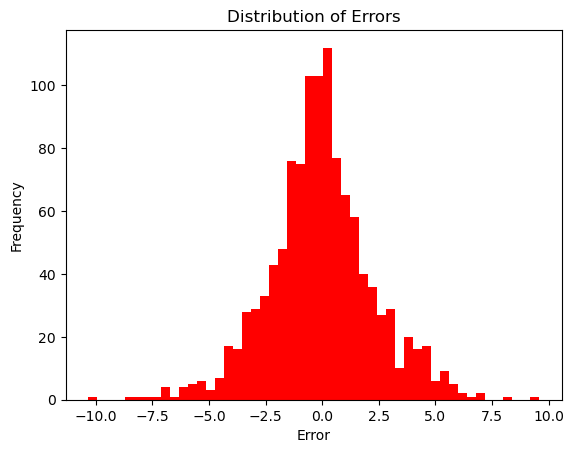

In [23]:
plt.hist(errors_df['Error'], bins=50, color='red')
plt.title('Distribution of Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

We have a normal distribution for our error distribution, which is what we wanted.

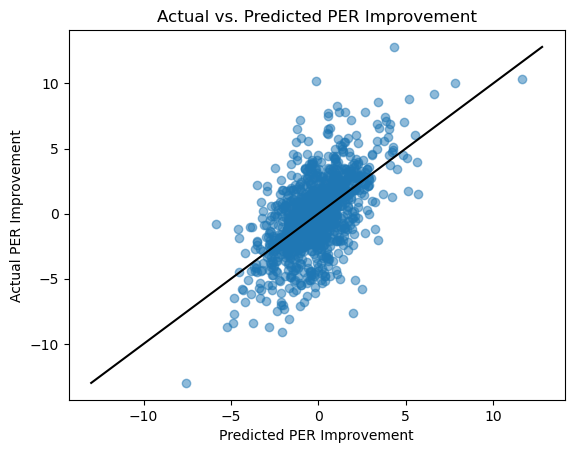

In [24]:
plt.scatter( errors_df['Predicted PER Improvement'], errors_df['Actual PER Improvement'], alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'black')  # A diagoal line for reference for a perfect relationship
plt.title('Actual vs. Predicted PER Improvement')
plt.ylabel('Actual PER Improvement')
plt.xlabel('Predicted PER Improvement')
plt.show()

From our scatter graph between actual vs predicted PER improvement, we do observe a relationship but the residuals are still quite significant. 

Next I want histograms of actual vs predicted PER Improvement for both our training and test set to investigate how our model predictions vary with actual results overall.

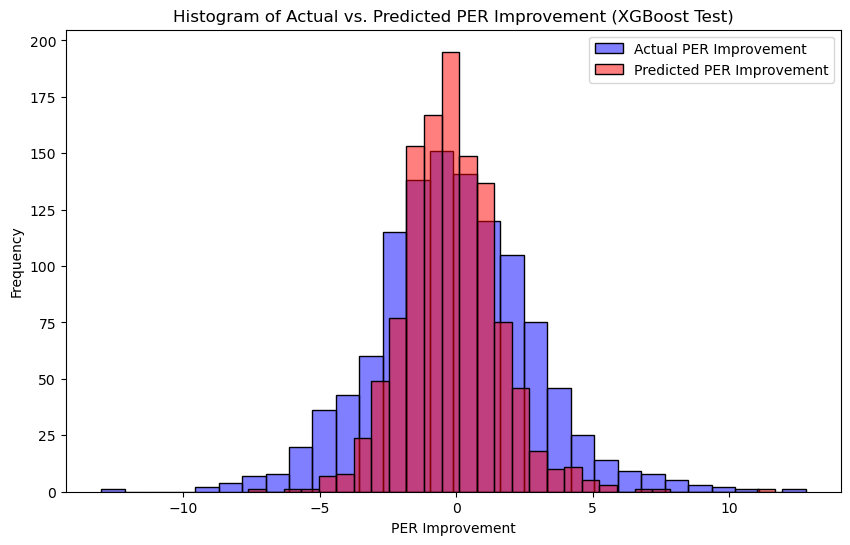

In [25]:
plt.figure(figsize=(10, 6))

sns.histplot(y_test, bins=30, color="blue", label='Actual PER Improvement', alpha=0.5)

sns.histplot(y_test_pred, bins=30, color="red", label='Predicted PER Improvement', alpha=0.5)

plt.xlabel('PER Improvement')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs. Predicted PER Improvement (XGBoost Test)')
plt.legend()
plt.show()

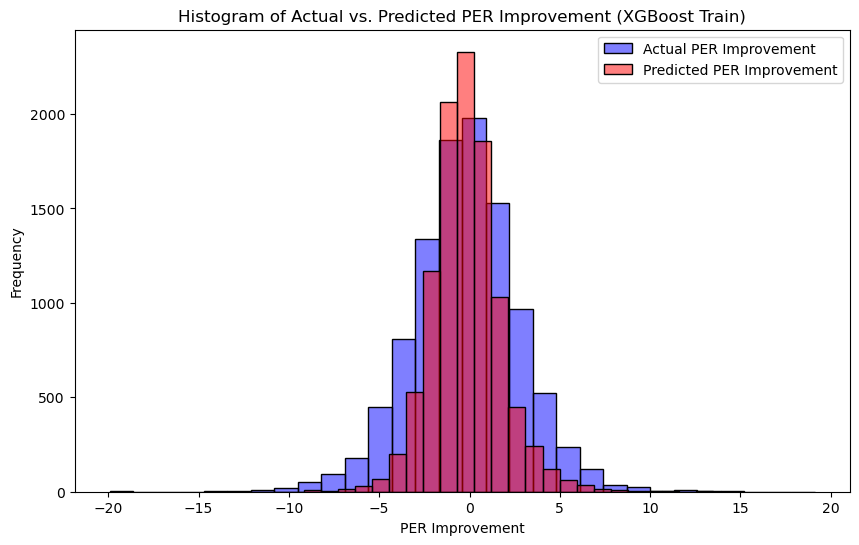

In [26]:
plt.figure(figsize=(10, 6))

sns.histplot(y_train, bins=30, color="blue", label='Actual PER Improvement', alpha=0.5)

sns.histplot(y_train_pred, bins=30, color="red", label='Predicted PER Improvement', alpha=0.5)

plt.xlabel('PER Improvement')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs. Predicted PER Improvement (XGBoost Train)')
plt.legend()
plt.show()

Our training set's predictions are shown to be closer to the predictions in our training set than our test set. This is expected as our train set has 9 times the number of rows of our test set. However, we can observe that both PER improvement predictions appear to be narrower than the actual PER improvements, with more data/bars concentrated around the centre. I believe that our model is trained to be more cautious in predictions as most PER Improvement values are low. However, there are a lot of outliers in the dataframe as there are always NBA players making big improvements sometimes. Since our model is more cautious, its likely to fail in capturing those big PER Improvement values. We can see that in our histograms, there are improvement values with 10+. However our model predicting no 10+ PER improvement, with even very little 5+ PER improvement.

This is the area I hope to tackle in the future. Although there are few players with these big PER Improvements, these are the players we want to capture and so I hope my model is able to include these improvements. In the future I hope to implement perhaps some smoting/scaling in my data for model to capture higher values, or assign more weights to higher values. 

Model comparisons will be in the model comparison notebook.